<a href="https://colab.research.google.com/github/redframelbx/datascience/blob/main/machine%20learning/Support_vector_machine_loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('/content/sample_data/loan_data.csv')

In [6]:
data = data.dropna()

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area', 'Status']
for i in col:
  data[i] = encoder.fit_transform(data[i])

data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


split into data and target

In [12]:
X = data.drop('Status', axis = 1)
Y = data['Status']

Data standardize and scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [16]:
Xscaled

array([[ 0.46272229, -1.3606721 , -0.76383834, ...,  0.27761216,
         0.41727407,  1.24604986],
       [ 0.46272229,  0.73493092,  0.21599542, ...,  0.27761216,
         0.41727407, -1.31798676],
       [ 0.46272229,  0.73493092, -0.76383834, ...,  0.27761216,
         0.41727407,  1.24604986],
       ...,
       [ 0.46272229,  0.73493092,  0.21599542, ...,  0.27761216,
         0.41727407,  1.24604986],
       [ 0.46272229,  0.73493092,  1.19582917, ...,  0.27761216,
         0.41727407,  1.24604986],
       [-2.16112345, -1.3606721 , -0.76383834, ...,  0.27761216,
        -2.39650647, -0.03596845]])

Train-test data splitting

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xscaled, Y,test_size=0.3, random_state=123)

In [19]:
print(len(xtrain))
print(len(xtest))

349
150


1    99
0    51
Name: Status, dtype: int64


<Axes: ylabel='Status'>

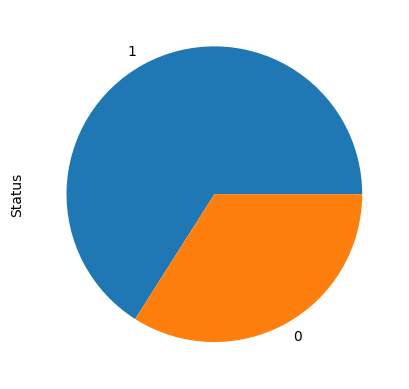

In [20]:
print(ytest.value_counts())
ytest.value_counts().plot(kind='pie')

MODEL TRAINING

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

In [22]:
prediction = svm.predict(xtest)

VISUALIZE MODEL PERFORMANCE

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, prediction)
print(cm)

[[19 32]
 [ 2 97]]


In [24]:
acc = metrics.accuracy_score(ytest, prediction)
print(acc)

0.7733333333333333


<Axes: >

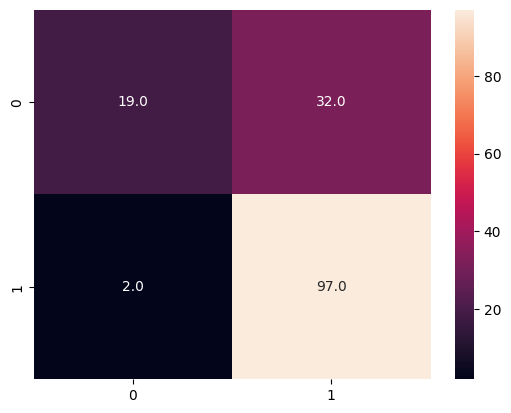

In [25]:
import seaborn as sns
sns.heatmap(cm, annot = True,fmt='.1f')

In [28]:
import pickle
pickle.dump(svm, open('svm_model.pkl','wb'))

In [29]:
imp_model = pickle.load(open('svm_model.pkl','rb'))

In [30]:
imp_model.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])